In [30]:

import gym
import numpy as np
import time

# Create the CartPole environment
env = gym.make('CartPole-v1', render_mode="rgb_array")

# Define the Q-learning algorithm
Q = np.zeros([env.observation_space.shape[0], env.action_space.n])
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            print(state)
            idx = np.argmax(state[0])
            action = np.argmax(Q[idx])
        env.render()

        # Take the chosen action and observe the next state and reward
        
        next_state, reward, done, _, info = env.step(action)

        # Update the Q-table
        Q[np.argmax(state[0])][action] += learning_rate * (reward + discount_factor * np.max(Q[np.argmax(next_state[0])]) - Q[np.argmax(state[0])][action])

        state = next_state
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward} State: {state}" )

# Once training is complete, you can use the Q-table to make decisions

# Example: Using the learned Q-table to play the game
# state = env.reset()
# done = False
# while not done:
#     action = np.argmax(Q[np.argmax(state[0])])
#     state, _, done, _, info = env.step(action)
#     env.render()

# # Don't forget to close the environment when you're done
# env.close()


(array([ 0.02467463,  0.02737551, -0.00632835,  0.00292243], dtype=float32), {})
[ 0.02522214 -0.16765511 -0.0062699   0.293602  ]
[ 2.1869037e-02 -3.6268711e-01 -3.9786089e-04  5.8430088e-01]
[ 0.0146153  -0.5578035   0.01128816  0.8768585 ]
[ 0.00345923 -0.75307703  0.02882533  1.1730688 ]
[-0.01160232 -0.94856155  0.0522867   1.4746473 ]
[-0.03057355 -1.144282    0.08177964  1.783192  ]
[-0.05345919 -1.3402225   0.11744349  2.1001368 ]
[-0.08026364 -1.5363121   0.15944622  2.4266942 ]
[-0.11098988 -1.7324083   0.20798011  2.7637863 ]
Episode 0: Total Reward: 10.0 State: [-0.14563805 -1.928278    0.26325583  3.1119654 ]
[-0.0485445   0.22659148  0.01610251 -0.3178564 ]
[-0.04401267  0.03124392  0.00974539 -0.02013911]
[-0.04338779 -0.16401643  0.0093426   0.27560258]
[-0.04666812 -0.35927042  0.01485465  0.5712175 ]
[-0.05385353 -0.5545975   0.026279    0.86854285]
[-0.06494547 -0.75006694  0.04364986  1.1693709 ]
[-0.07994682 -0.9457286   0.06703728  1.4754128 ]
[-0.09886139 -1.1416

KeyboardInterrupt: 

In [45]:
import gym
from gym import spaces
import numpy as np
import random
# from matplotlib.patches import Polygon
from shapely.geometry import Polygon

class BoxToPolygonEnv(gym.Env):
    def __init__(self):
        super(BoxToPolygonEnv, self).__init__()

        # Define action and observation spaces
        self.action_space = spaces.Discrete(4)  # Four discrete actions (move in four directions)
        self.observation_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)  # 2D state space

        # Initialize the environment
        self.polygon = self.generate_random_polygon()
        self.box1 = self.generate_random_box()
        self.box2 = self.generate_random_box()
        self.goal = self.calculate_polygon_center()

        # Initialize the agent's position
        self.agent_position1 = np.array([0.0, 0.0])
        self.agent_position2 = np.array([0.0, 0.0])

    def reset(self):
        # Reset the environment
        self.polygon = self.generate_random_polygon()
        self.box = self.generate_random_box()
        self.goal = self.calculate_polygon_center()
        self.agent_position = np.array([0.0, 0.0])
        return self.agent_position

    def step(self, action):
        # Take a step in the environment based on the chosen action
        if action == 0:  # Move up
            self.agent_position[1] += 0.1
        elif action == 1:  # Move down
            self.agent_position[1] -= 0.1
        elif action == 2:  # Move left
            self.agent_position[0] -= 0.1
        elif action == 3:  # Move right
            self.agent_position[0] += 0.1

        # Calculate reward
        distance_to_goal = np.linalg.norm(self.agent_position - self.goal)
        reward = -distance_to_goal  # Negative distance as we want to minimize it

        # Define episode termination conditions
        done = distance_to_goal < 0.1  # Terminate if the agent is close to the goal

        return self.agent_position, reward, done, {}

    def render(self, mode='human'):
        # Visualization (you can implement a custom visualization method here)
        pass

    def generate_random_polygon(self):
        #create a polygon 
        polygon = Polygon([(103.9174818, 1.3099216), (103.9182225, 1.3082086), (103.9184369, 1.3076434), (103.9194155, 1.3077896), (103.9188552,1.3094494), (103.9180992 ,1.3094457), (103.9178489, 1.3100437), (103.9174818, 1.3099216)])
        return polygon 
        
    def generate_random_box(self):
        #position
        return 0,0

    def calculate_polygon_center(self):
        polygon = self.polygon
        vertices = polygon.exterior.coords[:-1]
        num_vertices = len(vertices)
        sum_x = sum(vertex[0] for vertex in vertices)
        sum_y = sum(vertex[1] for vertex in vertices)
    
        center_x = sum_x / num_vertices
        center_y = sum_y / num_vertices
    
        return (center_x, center_y)

# Example usage of the custom environment
env = BoxToPolygonEnv()
obs = env.reset()

# for _ in range(100000):
#     action = env.action_space.sample()  # Random action
#     obs, reward, done, _ = env.step(action)
#     print(obs)

#     if done:
#         break
Q = np.zeros([env.observation_space.shape[0], env.action_space.n])
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            
            idx = np.argmax(state[0])
            action = np.argmax(Q[idx])
        env.render()

        # Take the chosen action and observe the next state and reward
        
        next_state, reward, done, info = env.step(action)

        # Update the Q-table
        Q[np.argmax(state[0])][action] += learning_rate * (reward + discount_factor * np.max(Q[np.argmax(next_state[0])]) - Q[np.argmax(state[0])][action])

        state = next_state
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward} State: {state}" )


env.close()


Episode 0: Total Reward: -49684335.44494706 State: [103.9   1.3]


KeyboardInterrupt: 

In [58]:
import gym
from gym import spaces
import numpy as np
import random
# from matplotlib.patches import Polygon
from shapely.geometry import Polygon

class BoxToPolygonEnv(gym.Env):
    def __init__(self):
        super(BoxToPolygonEnv, self).__init__()

        # Define action and observation spaces
        self.action_space = spaces.Discrete(4)  # Four discrete actions (move in four directions)
        self.observation_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)  # 2D state space

        # Initialize the environment
        self.polygon = self.generate_random_polygon()
        self.box1 = self.generate_random_box()
        self.box2 = self.generate_random_box()
        self.goal = self.calculate_polygon_center()

        # Initialize the agent's position
        self.agent_position1 = np.array([0.0, 0.0])
        self.agent_position2 = np.array([0.0, 0.0])

    def reset(self):
        # Reset the environment
        self.polygon = self.generate_random_polygon()
        self.box = self.generate_random_box()
        self.goal = self.calculate_polygon_center()
        self.agent_position = np.array([0.0, 0.0])
        return self.agent_position

    def step(self, action):
        # Take a step in the environment based on the chosen action
        if action == 0:  # Move up
            self.agent_position[1] += 0.1
        elif action == 1:  # Move down
            self.agent_position[1] -= 0.1
        elif action == 2:  # Move left
            self.agent_position[0] -= 0.1
        elif action == 3:  # Move right
            self.agent_position[0] += 0.1

        # Calculate reward
        distance_to_goal = np.linalg.norm(self.agent_position - self.goal)
        reward = -distance_to_goal  # Negative distance as we want to minimize it

        # Define episode termination conditions
        done = distance_to_goal < 0.1  # Terminate if the agent is close to the goal

        return self.agent_position, reward, done, {}

    def render(self, mode='human'):
        # Visualization (you can implement a custom visualization method here)
        pass

    def generate_random_polygon(self):
        #create a polygon 
        polygon = Polygon([(103.9174818, 1.3099216), (103.9182225, 1.3082086), (103.9184369, 1.3076434), (103.9194155, 1.3077896), (103.9188552,1.3094494), (103.9180992 ,1.3094457), (103.9178489, 1.3100437), (103.9174818, 1.3099216)])
        return polygon 
        
    def generate_random_box(self):
        #position
        return 0,0

    def calculate_polygon_center(self):
        polygon = self.polygon
        vertices = polygon.exterior.coords[:-1]
        num_vertices = len(vertices)
        sum_x = sum(vertex[0] for vertex in vertices)
        sum_y = sum(vertex[1] for vertex in vertices)
    
        center_x = sum_x / num_vertices
        center_y = sum_y / num_vertices
    
        return (center_x, center_y)

# Example usage of the custom environment
env = BoxToPolygonEnv()
obs = env.reset()

# for _ in range(100000):
#     action = env.action_space.sample()  # Random action
#     obs, reward, done, _ = env.step(action)
#     print(obs)

#     if done:
#         break
Q = np.zeros(4)
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            
            action = np.argmax(Q)
        

        # Take the chosen action and observe the next state and reward
        
        next_state, reward, done, info = env.step(action)
        # print(next_state)
        # print(Q)
        # Update the Q-table
        Q[action] += learning_rate * (reward  - Q[action])

        state = next_state
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward} State: {state}" )


env.close()


Episode 0: Total Reward: -140094.8948110454 State: [103.9   1.4]
Episode 100: Total Reward: -221723.51348509206 State: [104.    1.3]
Episode 200: Total Reward: -213213.42318787673 State: [104.    1.3]
Episode 300: Total Reward: -137204.78116705283 State: [104.    1.3]
Episode 400: Total Reward: -216806.55266945125 State: [104.    1.3]
Episode 500: Total Reward: -184023.23297312207 State: [103.9   1.4]
Episode 600: Total Reward: -104224.11569787405 State: [104.    1.3]
Episode 700: Total Reward: -134728.56921145244 State: [103.9   1.3]
Episode 800: Total Reward: -116357.67271127416 State: [104.    1.3]
Episode 900: Total Reward: -278189.6106192236 State: [104.    1.3]


do not collide


In [91]:
import gym
from gym import spaces
import numpy as np
import random
# from matplotlib.patches import Polygon
from shapely.geometry import Polygon

class BoxToPolygonEnv(gym.Env):
    def __init__(self):
        super(BoxToPolygonEnv, self).__init__()

        # Define action and observation spaces
        self.action_space = spaces.Discrete(4)  # Four discrete actions (move in four directions)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)  # 2D state space

        # Initialize the environment
        self.polygon = self.generate_random_polygon()
        self.goal = self.calculate_polygon_center()

        # Initialize the agent's position
        self.agent_position1 = self.calculate_polygon_center()
        self.agent_position2 = self.calculate_polygon_center()
        self.box1 = self.generate_random_box(0.0,0.0)
        self.box2 = self.generate_random_box(0.0,0.0)

    def reset(self):
        # Reset the environment
        self.polygon = self.generate_random_polygon()
    
        self.goal = self.calculate_polygon_center()
        self.agent_position1 = self.calculate_polygon_center()
        self.agent_position2 = self.calculate_polygon_center()
        self.box1 = self.generate_random_box(0.0,0.0)
        self.box2 = self.generate_random_box(0.0,0.0)
        return [self.agent_position1, self.agent_position2]

    def step(self, action, agent):
        # Take a step in the environment based on the chosen action
        if agent == 1:
            if action == 0:  # Move up
                self.agent_position1[1] += 0.00001
            elif action == 1:  # Move down
                self.agent_position1[1] -= 0.00001
            elif action == 2:  # Mo1ve left
                self.agent_position1[0] -= 0.00001
            elif action == 3:  # Mo1ve right
                self.agent_position1[0] += 0.00001
        else:
            if action == 0:  # Move up
                self.agent_position2[1] += 0.00001
            elif action == 1:  # Mo2ve down
                self.agent_position2[1] -= 0.00001
            elif action == 2:  # Mo2ve left
                self.agent_position2[0] -= 0.00001
            elif action == 3:  # Mo2ve right
                self.agent_position2[0] += 0.00001

        # Calculate reward
        
        self.box1 = self.generate_random_box(self.agent_position1[0],self.agent_position1[1])
        self.box2 = self.generate_random_box(self.agent_position2[0],self.agent_position2[1])
        # distance_to_goal = np.linalg.norm(self.agent_position - self.goal)
        if self.box1.intersects(self.box2):
            reward = -1
            done = False
        else:
            reward = 1
            done = True # Terminate if the agent is close to the goal

        return [self.agent_position1,self.agent_position2], reward, done, {}

    def render(self, mode='human'):
        # Visualization (you can implement a custom visualization method here)
        pass

    def generate_random_polygon(self):
        #create a polygon 
        polygon = Polygon([(103.9174818, 1.3099216), (103.9182225, 1.3082086), (103.9184369, 1.3076434), (103.9194155, 1.3077896), (103.9188552,1.3094494), (103.9180992 ,1.3094457), (103.9178489, 1.3100437), (103.9174818, 1.3099216)])
        return polygon 
        
    def generate_random_box(self,x, y, width=0.0001, height=0.0001):
        #generate random polygon 
        poly = 
        return Polygon([(x, y), (x + width, y), (x + width, y + height), (x, y + height)])
    
    def generate_random_polygon(self, x,y):
        
        num_vertices = random.randint(5, 10)
        vertices = [(x + random.randint(-0.0001, +0.0001), y+ random.randint(-0.0001, +0.0001)) for _ in range(num_vertices)]
        return Polygon(vertices)


    def calculate_polygon_center(self):
        polygon = self.polygon
        vertices = polygon.exterior.coords[:-1]
        num_vertices = len(vertices)
        sum_x = sum(vertex[0] for vertex in vertices)
        sum_y = sum(vertex[1] for vertex in vertices)
    
        center_x = sum_x / num_vertices
        center_y = sum_y / num_vertices
    
        return np.array([center_x, center_y])
    
        #check if point is inside the polygon (offset 0.01 inside the polygon)
        #check 
# Example usage of the custom environment
env = BoxToPolygonEnv()
obs = env.reset()

# for _ in range(100000):
#     action = env.action_space.sample()  # Random action
#     obs, reward, done, _ = env.step(action)
#     print(obs)

#     if done:
#         break
Q = np.zeros(4)
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            
            action = np.argmax(Q)
        

        # Take the chosen action and observe the next state and reward
        
        next_state, reward, done, info = env.step(action,np.random.uniform(1,2))
        # print(next_state)
        # print(Q)
        # Update the Q-table
        Q[action] += learning_rate * (reward  - Q[action])

        state = next_state
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward} State: {state}" )


env.close()


Episode 0: Total Reward: -1341 State: [array([103.91833714,   1.30892886]), array([103.91832714,   1.30902886])]
Episode 100: Total Reward: -9 State: [array([103.91833714,   1.30892886]), array([103.91834714,   1.30902886])]
Episode 200: Total Reward: -8 State: [array([103.91833714,   1.30892886]), array([103.91833714,   1.30902886])]
Episode 300: Total Reward: -8 State: [array([103.91833714,   1.30892886]), array([103.91833714,   1.30902886])]
Episode 400: Total Reward: -12 State: [array([103.91833714,   1.30892886]), array([103.91833714,   1.30902886])]
Episode 500: Total Reward: -11 State: [array([103.91833714,   1.30892886]), array([103.91832714,   1.30902886])]
Episode 600: Total Reward: -8 State: [array([103.91833714,   1.30892886]), array([103.91833714,   1.30902886])]
Episode 700: Total Reward: -13 State: [array([103.91833714,   1.30892886]), array([103.91834714,   1.30902886])]
Episode 800: Total Reward: -11 State: [array([103.91833714,   1.30892886]), array([103.91834714,   1

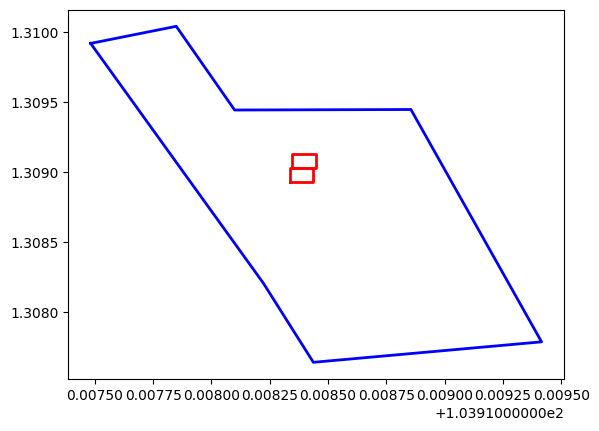

In [92]:
#plot the polygon and box 1 and 2 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

x, y = env.polygon.exterior.xy
fig, ax = plt.subplots()
ax.plot(x, y, color='blue', linewidth=2)

x1,y1 = env.box1.exterior.xy
ax.plot(x1, y1, color='red', linewidth=2)
x2,y2 = env.box2.exterior.xy
ax.plot(x2, y2, color='red', linewidth=2)

In [28]:
[env.observation_space, env.action_space.n]

[Box(0.0, 1.0, (2,), float32), 4]

In [18]:
env.calculate_polygon_center()
# env.agent_position

(103.91833714285714, 1.3089288571428572)